In [26]:
import os
from PIL import Image

from imgbeddings import imgbeddings

import csv

In [9]:
os.listdir('../0_data/beanleaf_dataset')

['test', 'train', 'validation']

In [8]:
os.getcwd()

'/Users/jaganlalthoppe/workspace/mlops/azure/beanleaf-disease-classifier/1_model_development'

In [16]:
root_folder = os.path.normpath(os.getcwd() + os.sep + os.pardir)

In [17]:
data_folder = '0_data/beanleaf_dataset'
dataset_folder = os.path.join(root_folder, data_folder)

In [19]:
beanleaf_data_partition_folders = os.listdir(dataset_folder)

### Get files from each folder (test, train & validation)

In [22]:
files_to_remove = ['.DS_Store']

In [24]:
# list file and directories
test_folder_path = os.path.join(dataset_folder, beanleaf_data_partition_folders[0])
print(test_folder_path)
test_folder_files = os.listdir(test_folder_path)
test_folder_files = [i for i in test_folder_files if i not in files_to_remove]
print(test_folder_files)

/Users/jaganlalthoppe/workspace/mlops/azure/beanleaf-disease-classifier/0_data/beanleaf_dataset/test
['healthy', 'angular_leaf_spot', 'bean_rust']


In [25]:
test_healthy_folder_path = os.path.join(test_folder_path, test_folder_files[0])
test_healthy_folder_files = os.listdir(test_healthy_folder_path)
print(test_healthy_folder_files)

['healthy_test.21.jpg', 'healthy_test.35.jpg', 'healthy_test.34.jpg', 'healthy_test.20.jpg', 'healthy_test.36.jpg', 'healthy_test.22.jpg', 'healthy_test.23.jpg', 'healthy_test.37.jpg', 'healthy_test.8.jpg', 'healthy_test.33.jpg', 'healthy_test.27.jpg', 'healthy_test.26.jpg', 'healthy_test.32.jpg', 'healthy_test.9.jpg', 'healthy_test.24.jpg', 'healthy_test.30.jpg', 'healthy_test.18.jpg', 'healthy_test.19.jpg', 'healthy_test.31.jpg', 'healthy_test.25.jpg', 'healthy_test.41.jpg', 'healthy_test.40.jpg', 'healthy_test.7.jpg', 'healthy_test.28.jpg', 'healthy_test.14.jpg', 'healthy_test.15.jpg', 'healthy_test.29.jpg', 'healthy_test.6.jpg', 'healthy_test.4.jpg', 'healthy_test.17.jpg', 'healthy_test.16.jpg', 'healthy_test.5.jpg', 'healthy_test.1.jpg', 'healthy_test.12.jpg', 'healthy_test.13.jpg', 'healthy_test.0.jpg', 'healthy_test.2.jpg', 'healthy_test.11.jpg', 'healthy_test.39.jpg', 'healthy_test.38.jpg', 'healthy_test.10.jpg', 'healthy_test.3.jpg']


In [27]:
# list to store files
res = []

# Iterate directory
for path in os.listdir(test_healthy_folder_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(test_healthy_folder_path, path)):
        res.append(path)
print(res)

['healthy_test.21.jpg', 'healthy_test.35.jpg', 'healthy_test.34.jpg', 'healthy_test.20.jpg', 'healthy_test.36.jpg', 'healthy_test.22.jpg', 'healthy_test.23.jpg', 'healthy_test.37.jpg', 'healthy_test.8.jpg', 'healthy_test.33.jpg', 'healthy_test.27.jpg', 'healthy_test.26.jpg', 'healthy_test.32.jpg', 'healthy_test.9.jpg', 'healthy_test.24.jpg', 'healthy_test.30.jpg', 'healthy_test.18.jpg', 'healthy_test.19.jpg', 'healthy_test.31.jpg', 'healthy_test.25.jpg', 'healthy_test.41.jpg', 'healthy_test.40.jpg', 'healthy_test.7.jpg', 'healthy_test.28.jpg', 'healthy_test.14.jpg', 'healthy_test.15.jpg', 'healthy_test.29.jpg', 'healthy_test.6.jpg', 'healthy_test.4.jpg', 'healthy_test.17.jpg', 'healthy_test.16.jpg', 'healthy_test.5.jpg', 'healthy_test.1.jpg', 'healthy_test.12.jpg', 'healthy_test.13.jpg', 'healthy_test.0.jpg', 'healthy_test.2.jpg', 'healthy_test.11.jpg', 'healthy_test.39.jpg', 'healthy_test.38.jpg', 'healthy_test.10.jpg', 'healthy_test.3.jpg']


In [ ]:
# list to store files
res = []

# Iterate directory
for path in os.listdir(test_healthy_folder_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(test_healthy_folder_path, path)):
        res.append(os.path.join(test_healthy_folder_path, path))
print(res)

In [29]:
ibed = imgbeddings()

/Users/jaganlalthoppe/workspace/mlops/azure/beanleaf-disease-classifier/env/lib/python3.9/site-packages/huggingface_hub/file_download.py:588: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  warnings.warn(


In [35]:
header = ['name', 'url', 'vector']
with open('beanleaf_test.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    data = []
    # Iterate directory
    for path in os.listdir(test_healthy_folder_path):
        # check if current path is a file
        file_name = os.path.join(test_healthy_folder_path, path)
        if os.path.isfile(file_name):
            data.append(path)
            data.append(file_name)
            embedding = ibed.to_embeddings(file_name)
            data.append(embedding)

            # write the data
            writer.writerow(data)

In [ ]:

embedding

In [3]:
local_data_path = '../0_data/beanleaf_dataset'
# list to store files
res = []

# Iterate directory
for path in os.listdir(local_data_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(local_data_path, path)):
        res.append(path)
print(res)

[]


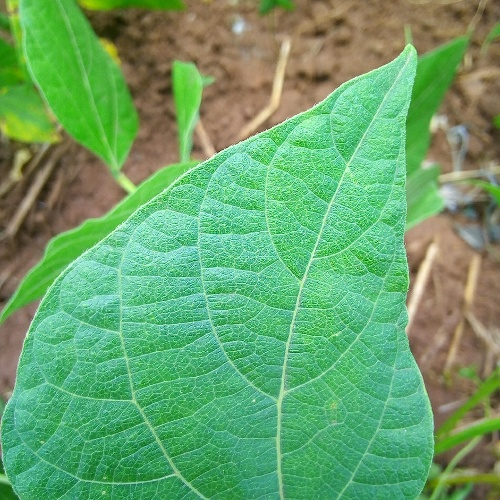

In [11]:
healthy_train_0 = Image.open(local_data_path+'/train/healthy/healthy_train.0.jpg')
healthy_train_0

In [ ]:
embedding = ibed.to_embeddings(healthy_train_0)
embedding